## Plot the embeddings

In [2]:
EMBEDDINGS = "cora.emb.npz"
DATASET = "../../datasets/gae-benchmarks/cora.npz"

In [14]:
import numpy as np
%config InlineBackend.figure_format = 'svg' 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.manifold import MDS

In [4]:
# Load the pre-computed embeddings
emb = np.load(EMBEDDINGS)

In [11]:
# Downscale the embeddings
mds = MDS(n_jobs=-2, )
mds.fit(emb.astype(np.float64))

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=-2, random_state=None, verbose=0)

In [23]:
# Load the ground truth labels
dataset = np.load(DATASET)
labels = dataset['labels']
adjcol = dataset['adjcol']
adjrow = dataset['adjrow']
edgeids = []
for i, j in zip(adjcol, adjrow):
    if (j, i) not in edgeids:
        edgeids.append((i, j))

In [24]:
# Turn labels into colors
palette = sb.color_palette(n_colors=labels.shape[1])
colors = np.array(palette)[np.argmax(labels, axis=1)]

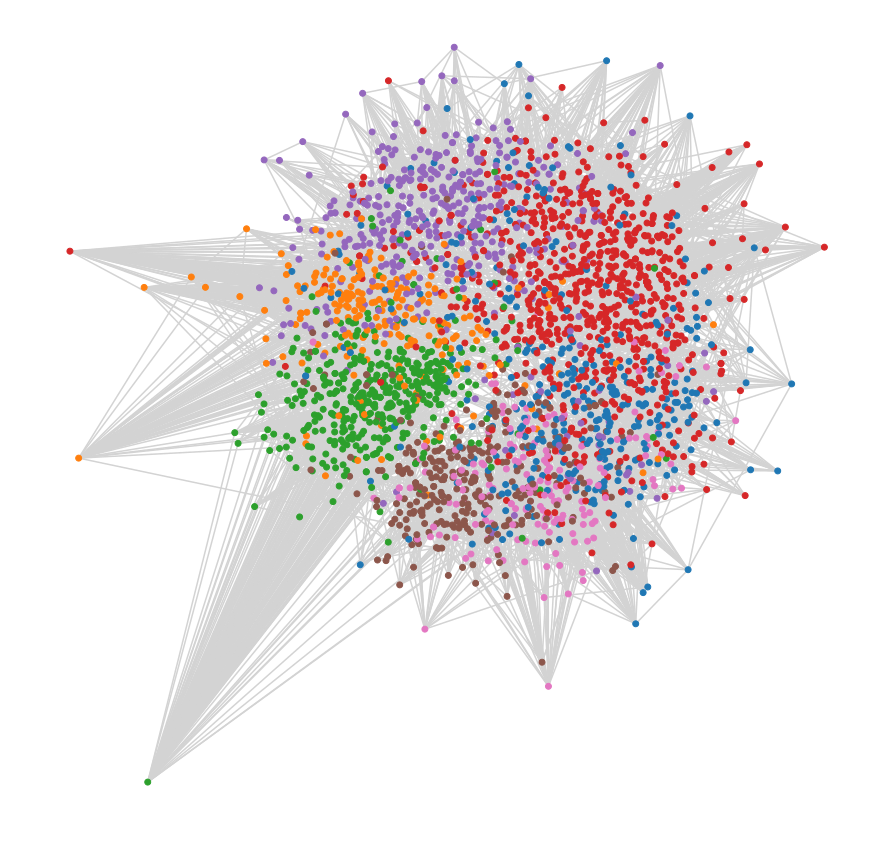

In [25]:
# Plot the downscaled embeddings and the links
fig, ax = plt.subplots(figsize=(15, 15))
edges = np.array([[mds.embedding_[i], mds.embedding_[j]] for (i, j) in edgeids])
edges = edges.transpose([2, 1, 0])
ax.plot(edges[0], edges[1], color='lightgrey', zorder=1)
ax.scatter(mds.embedding_[:, 0], mds.embedding_[:, 1], c=colors, zorder=2)
ax.axis('off')
fig.savefig("embeddings.svg", bbox_inches='tight')